In [18]:
import numpy as np
import scipy.interpolate as interpolate
import math
import glob
from matplotlib import pyplot as plt

m_e = 9.1e-31

def E_to_v(eV):
    return np.sqrt((2 * eV * 1.60218e-19) / (m_e)) # m/s

def liquid_sigma_e(eV, gas_sigma_e):
    if eV < 2.85:
        return 5.5e-16
    return gas_sigma_e(eV)

def liquid_sigma_p(eV, S, gas_sigma_p):
    if eV < 3.95:
        return S(eV) * 5.5e-16
    return gas_sigma_p(eV)

sigma_e_eVs, sigma_e = np.loadtxt('cross-section-data/energy_xsec.txt', unpack=True)       # m^2
sigma_e *= 1e4                                                                         # changing to cm^2
sigma_e_func = interpolate.interp1d(sigma_e_eVs, sigma_e, kind='slinear')

sigma_p_eVs, sigma_p = np.loadtxt('cross-section-data/momentum_xsec.txt', unpack=True)     # m^2
sigma_p *= 1e4                                                                         # changing to cm^2
sigma_p_func = interpolate.interp1d(sigma_p_eVs, sigma_p, kind='slinear')

sigma_i_eVs = np.array([0, 15.75, 17, 18.5, 20, 21, 22.5, 25, 27.5, 30, 32.5, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100, 110, 120, 140, 160, 180, 200, 225, 250, 275, 300, 350, 400, 500, 600, 700, 800, 900, 1000])                                                      # eV
sigma_i = np.array([0, 0, 0.159, 0.419, 0.604, 0.769, 1.00, 1.25, 1.58, 1.75, 2.07, 2.21, 2.41, 2.49, 2.53, 2.53, 2.51, 2.51, 2.52, 2.51, 2.54, 2.55, 2.51, 2.48, 2.42, 2.33, 2.25, 2.17, 2.09, 2.01, 1.91, 1.80, 1.73, 1.58, 1.47, 1.27, 1.13, 1.01, 0.914, 0.850, 0.783])     # 1e-16 cm^2
sigma_i *= 1e-16                                                                                                                                                                                                                                                                # changing to cm^2
sigma_i_func = interpolate.interp1d(sigma_i_eVs, sigma_i, kind='slinear')

S_eVs = np.array([0, 1, 2, 3, 4, 5, 6, 7])                                             # eV
S = np.array([0.048, 0.055, 0.125, 0.4, 1.115, 1.29, 1.16, 1.01])
S_func = interpolate.interp1d(S_eVs, S, kind='quadratic', fill_value=(0.048, 1), bounds_error=False)

final_sigma_e = np.vectorize(lambda eV: liquid_sigma_e(eV, sigma_e_func))
final_sigma_p = np.vectorize(lambda eV: liquid_sigma_p(eV, S_func, sigma_p_func))

eVs_plot = np.logspace(-3, np.log10(299), 100)

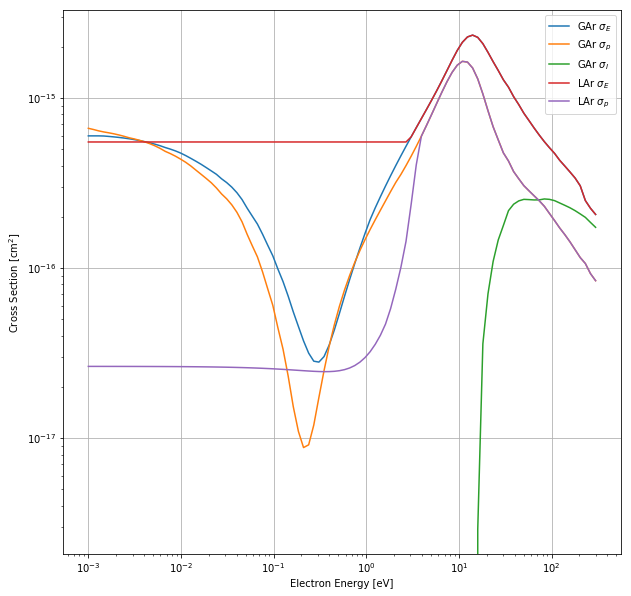

In [13]:
fig = plt.figure(figsize=(10,10))

plt.plot(eVs_plot, sigma_e_func(eVs_plot), label=r'GAr $\sigma_E$')
plt.plot(eVs_plot, sigma_p_func(eVs_plot), label=r'GAr $\sigma_p$')
plt.plot(eVs_plot, sigma_i_func(eVs_plot), label=r'GAr $\sigma_I$')
plt.plot(eVs_plot, final_sigma_e(eVs_plot), label=r'LAr $\sigma_E$')
plt.plot(eVs_plot, final_sigma_p(eVs_plot), label=r'LAr $\sigma_p$')

plt.xlabel('Electron Energy [eV]')
plt.ylabel(r'Cross Section [cm$^2$]')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

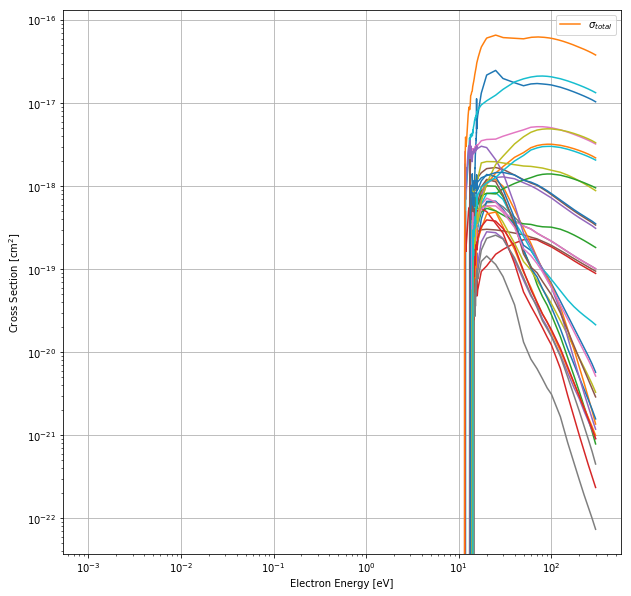

In [50]:
fig = plt.figure(figsize=(10,10))

file_list = glob.glob('cross-section-data/excite_xsec_*.txt')

x = np.logspace(np.log10(1e-3), np.log10(299.99), 1000)
y = np.zeros([1000])

for file in file_list:
    x_temp, y_temp = np.loadtxt(file, unpack=True)
    interp_func = interpolate.interp1d(x_temp, y_temp, kind='slinear', fill_value=(0., 0.), bounds_error=False)
    plt.plot(x_temp, y_temp * 1e4)
    y += interp_func(x)
    
plt.plot(x, y * 1e4, label='$\sigma_{total}$')

plt.xlabel('Electron Energy [eV]')
plt.ylabel('Cross Section [cm$^2$]')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

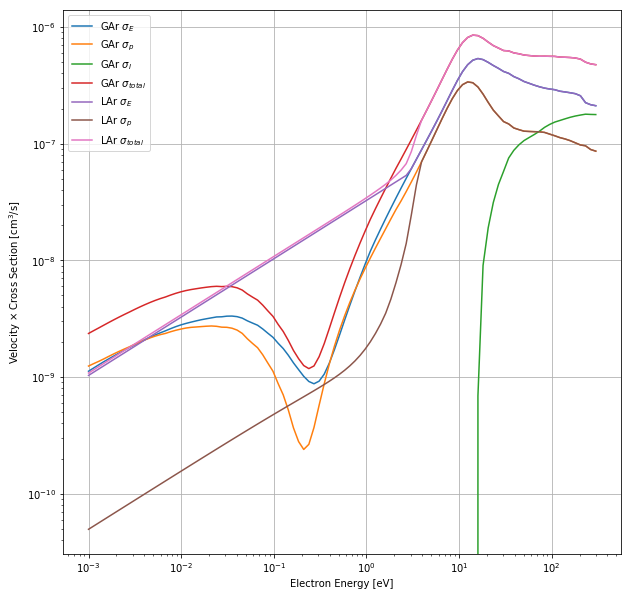

In [14]:
fig = plt.figure(figsize=(10,10))

plt.plot(eVs_plot, sigma_e_func(eVs_plot) * E_to_v(eVs_plot) * 1e2, label=r'GAr $\sigma_E$')
plt.plot(eVs_plot, sigma_p_func(eVs_plot) * E_to_v(eVs_plot) * 1e2, label=r'GAr $\sigma_p$')
plt.plot(eVs_plot, sigma_i_func(eVs_plot) * E_to_v(eVs_plot) * 1e2, label=r'$\sigma_I$')
plt.plot(eVs_plot, (sigma_e_func(eVs_plot) + sigma_p_func(eVs_plot) + sigma_i_func(eVs_plot)) * E_to_v(eVs_plot) * 1e2, label=r'GAr $\sigma_{total}$')
plt.plot(eVs_plot, final_sigma_e(eVs_plot) * E_to_v(eVs_plot) * 1e2, label=r'LAr $\sigma_E$')
plt.plot(eVs_plot, final_sigma_p(eVs_plot) * E_to_v(eVs_plot) * 1e2, label=r'LAr $\sigma_p$')
plt.plot(eVs_plot, (final_sigma_e(eVs_plot) + final_sigma_p(eVs_plot) + sigma_i_func(eVs_plot)) * E_to_v(eVs_plot) * 1e2, label=r'LAr $\sigma_{total}$')

plt.xlabel('Electron Energy [eV]')
plt.ylabel(r'Velocity $\times$ Cross Section [cm$^3$/s]')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

In [53]:
eVs_save = np.logspace(np.log10(1e-3), np.log10(299.99), 1000)

sigma_e_log = np.array([])
sigma_p_log = np.array([])
sigma_i_log = np.array([])
K_max_log = np.array([])

np.savetxt('gen-cross-sections/sigma_e_gas.txt', sigma_e_func(eVs_save), newline=',')
np.savetxt('gen-cross-sections/sigma_p_gas.txt', sigma_p_func(eVs_save), newline=',')
np.savetxt('gen-cross-sections/K_max_gas.txt', (sigma_e_func(eVs_save) + sigma_p_func(eVs_save) + sigma_i_func(eVs_save) + y * 1e4) * E_to_v(eVs_save) * 1e2 * 3, newline=',')
np.savetxt('gen-cross-sections/sigma_e.txt', final_sigma_e(eVs_save), newline=',')
np.savetxt('gen-cross-sections/sigma_p.txt', final_sigma_p(eVs_save), newline=',')
np.savetxt('gen-cross-sections/sigma_i.txt', sigma_i_func(eVs_save), newline=',')
np.savetxt('gen-cross-sections/K_max.txt', (final_sigma_e(eVs_save) + final_sigma_p(eVs_save) + sigma_i_func(eVs_save) + y * 1e4) * E_to_v(eVs_save) * 1e2 * 3, newline=',')
np.savetxt('gen-cross-sections/sigma_excite_total.txt', y * 1e4, newline=',')

print('Saved')

Saved
